### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pyskim import skim

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [29]:
data = pd.read_csv('data/coupons.csv')
data.info()
data['Y'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Y
1    7210
0    5474
Name: count, dtype: int64

In [26]:
display(data.shape)
skim(data)

(12684, 26)

── Data Summary ────────────────────────────────────────────────────────────────────────────────────
type                 value
-----------------  -------
Number of rows       12684
Number of columns       26
──────────────────────────────────────────────────
Column type frequency:
          Count
------  -------
object       18
int64         8

── Variable type: number ───────────────────────────────────────────────────────────────────────────
    name                 na_count    mean      sd    p0    p25    p50    p75    p100  hist
--  -----------------  ----------  ------  ------  ----  -----  -----  -----  ------  ----------
 0  temperature                 0  63.3    19.2      30     55     80     80      80  ▃▁▁▁▁▅▁▁▁▇
 1  has_children                0   0.414   0.493     0      0      0      1       1  ▇▁▁▁▁▁▁▁▁▅
 2  toCoupon_GEQ5min            0   1       0         1      1      1      1       1  ▁▁▁▁▁▇▁▁▁▁
 3  toCoupon_GEQ15min           0   0.561   0.496     0      0      1   

2. Investigate the dataset for missing or problematic data.

Text(0.5, 1.0, 'Missing Values (Black = Values)')

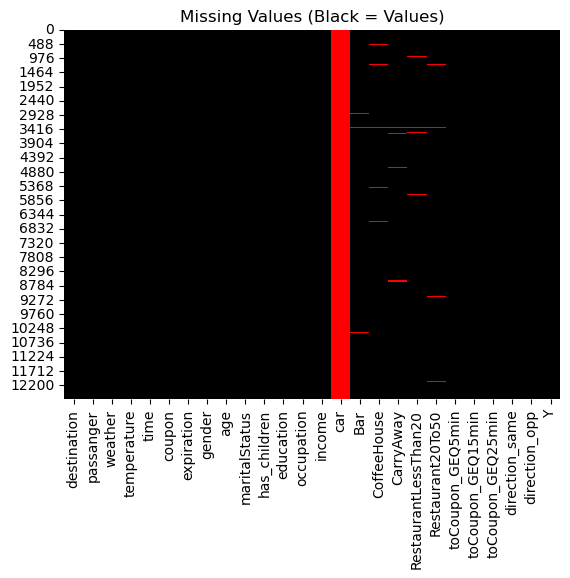

In [15]:
data.isnull().sum()
ax = sns.heatmap(data.isnull(), cmap=['black', 'red'], cbar=False)
ax.set_title('Missing Values (Black = Values)')

3. Decide what to do about your missing data -- drop, replace, other...

<Axes: >

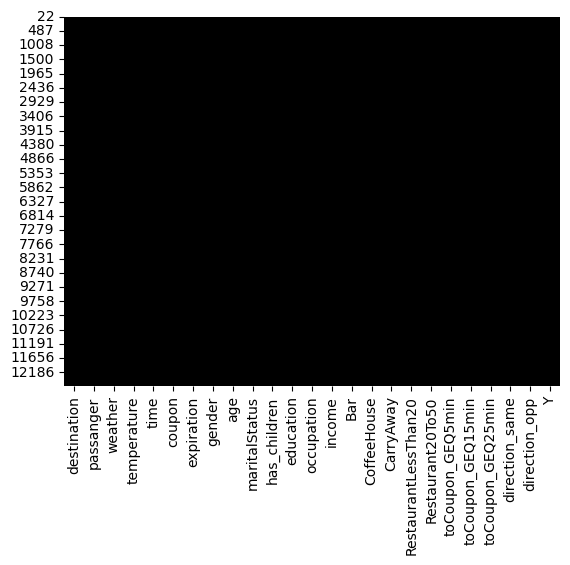

In [23]:
# Drop the car column as it is mostly missing
data2 = data.drop(columns=['car'])

# Drop the observations where values are missing
# as this is a small percentage of the overall observartion count
data2 = data2.dropna()

# Visualize
sns.heatmap(data2.isnull(), cmap=['black', 'red'], cbar=False)

4. What proportion of the total observations chose to accept the coupon?



In [42]:
accept = data2.groupby('Y')[['Y']].count()
accept['Percent'] = (accept['Y'] / accept['Y'].sum()) * 100
accept


,Y,Percent
Y,,
0,5202,43.066479
1,6877,56.933521


5. Use a bar plot to visualize the `coupon` column.

/tmp/ipykernel_53612/162826517.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 15,


Text(0, 0.5, 'Count')

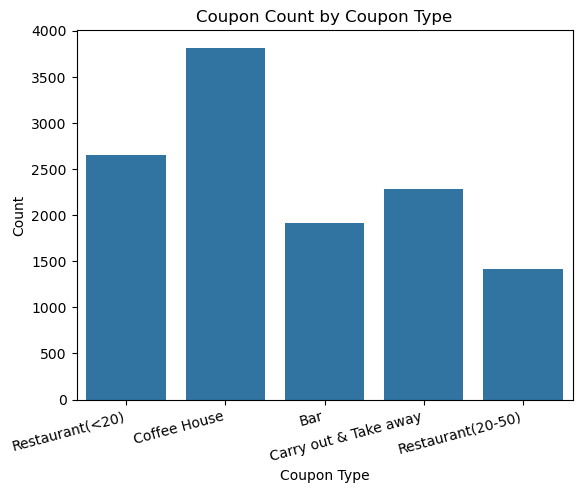

In [53]:
ax = sns.countplot(data2, x='coupon')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 15,
                   horizontalalignment='right')
ax.set_title("Coupon Count by Coupon Type")
ax.set_xlabel('Coupon Type')
ax.set_ylabel('Count')

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature')

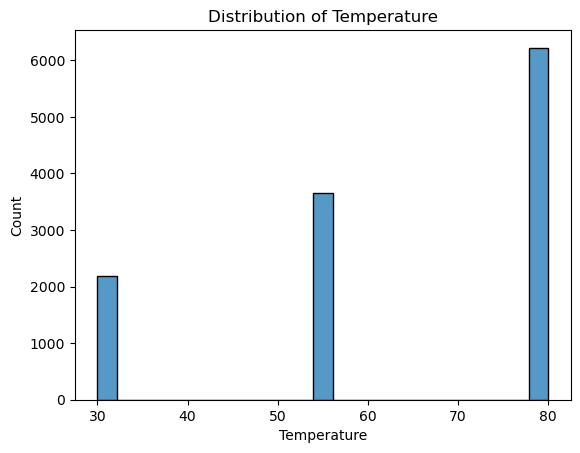

In [60]:
# Histogram of Temperature
ax = sns.histplot(data2, x='temperature')
ax.set_title('Distribution of Temperature')
ax.set_xlabel('Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [68]:
bcoupons = data2.query('coupon == "Bar"')
display(bcoupons.shape)
bcoupons.info()

(1913, 25)

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [73]:
accepted = bcoupons.groupby('Y')[['Y']].count()
accepted['Percent'] = (accepted['Y'] / accepted['Y'].sum()) * 100

accepted

,Y,Percent
Y,,
0,1125,58.808155
1,788,41.191845


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [187]:
# Create a function to look at acceptance of coupons
def acceptance(log_cond, bcoupons):
    """Creates an acceptance data frame

    Args:
        log_cond (numpy logical): numpy True False vector
        bcoupons (pandas dataframe): data frame with coupons data
    """
    bcoupons['Bar4'] = np.where(log_cond, 'group', 'others')

    accepted1 = (bcoupons.groupby(['Bar4','Y'])
                         .count()
                         .reset_index()[['Bar4', 'Y', 'Bar']]
                         .groupby('Bar4')
                         .sum()
                         .reset_index())

    accepted2 = (bcoupons.groupby(['Bar4','Y'])
                         .count()
                         .reset_index()[['Bar4', 'Y', 'Bar']])

    accepted = (pd.merge(accepted2, accepted1, on='Bar4', how='left')[['Bar4', 'Y_x', 'Bar_x', 'Bar_y']]
                  .rename(columns={'Bar4':'Groups', 'Y_x':'Y', 'Bar_x':'Count1', 'Bar_y':'Count2'}))
    accepted['Percent'] = (accepted['Count1'] / accepted['Count2']) * 100

In [188]:
bcoupons['Bar2'] = np.where(bcoupons['Bar'].isin(['4~8', 'gt8']), 'gt3', 'lt3')

accepted1 = (bcoupons.groupby(['Bar2','Y'])
                    .count()
                    .reset_index()[['Bar2', 'Y', 'Bar']]
                    .groupby('Bar2')
                    .sum()
                    .reset_index())

accepted2 = (bcoupons.groupby(['Bar2','Y'])
                    .count()
                    .reset_index()[['Bar2', 'Y', 'Bar']])

accepted = (pd.merge(accepted2, accepted1, on='Bar2', how='left')[['Bar2', 'Y_x', 'Bar_x', 'Bar_y']]
              .rename(columns={'Bar2':'Freq', 'Y_x':'Y', 'Bar_x':'Count1', 'Bar_y':'Count2'}))
accepted['Percent'] = (accepted['Count1'] / accepted['Count2']) * 100
accepted = accepted.query('Y == 1')[['Freq', 'Y', 'Percent']]


display(accepted)

print(f'Those going to the bar 4 or more times accepted 76% of the time.')
print(f'Those going to the bar 3 or less times accepted 37% of the time.')


/tmp/ipykernel_53612/401796066.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcoupons['Bar4'] = np.where(log_cond, 'group', 'others')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [166]:
bcoupons['Bar3'] = np.where(bcoupons['Bar'].isin(['1~3','4~8', 'gt8'])
                            & bcoupons['age'].isin(['26', '31', '36', '41', '46', '50plus']),'gt25', 'lt25')

accepted1 = (bcoupons.groupby(['Bar3','Y'])
                     .count()
                     .reset_index()[['Bar3', 'Y', 'Bar']]
                     .groupby('Bar3')
                     .sum()
                     .reset_index())

accepted2 = (bcoupons.groupby(['Bar3','Y'])
                     .count()
                     .reset_index()[['Bar3', 'Y', 'Bar']])

accepted = (pd.merge(accepted2, accepted1, on='Bar3', how='left')[['Bar3', 'Y_x', 'Bar_x', 'Bar_y']]
              .rename(columns={'Bar3':'Groups', 'Y_x':'Y', 'Bar_x':'Count1', 'Bar_y':'Count2'}))
accepted['Percent'] = (accepted['Count1'] / accepted['Count2']) * 100
accepted = accepted.query('Y == 1')[['Groups', 'Y', 'Percent']]

display(accepted)

print(f'Those age 25 going at least once a month accepted 76% of the time.')
print(f'All others accepted 37% of the time.')

/tmp/ipykernel_53612/2208043678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcoupons['Bar3'] = np.where(bcoupons['Bar'].isin(['1~3','4~8', 'gt8'])


,Groups,Y,Percent
1,gt25,1,68.982630
3,lt25,1,33.774834


Those age 25 going at least once a month accepted 76% of the time.
All others accepted 37% of the time.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [185]:
# Define interest groups
cat_bar = ['1~3','4~8', 'gt8']
cat_passanger = ['Friend(s)', 'Partner']
cat_occupation = ['Farming Fishing and Forestry']

# Create logical
log_cond = (bcoupons['Bar'].isin(cat_bar)
            & bcoupons['passanger'].isin(cat_passanger)
            & np.logical_not(bcoupons['occupation'].isin(cat_occupation)))



    return accepted

acceptance(log_cond, bcoupons)


/tmp/ipykernel_53612/722602760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcoupons['Bar4'] = np.where(log_cond, 'group', 'others')


,Groups,Y,Count1,Count2,Percent
0,group,0,54,189,28.571429
1,group,1,135,189,71.428571
2,others,0,1071,1724,62.122970
3,others,1,653,1724,37.877030


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [186]:
# Define logical cat 1
cat_bar = ['1~3','4~8', 'gt8']
cat_passanger = ['Friend(s)', 'Partner']
cat_marital_status = ['widowed']
cat_age = ['21', '26', 'below21']
cat_restaurant = ['4~8', 'gt8']
cat_income = ['Less than $12500', '$12500 - $24999', '$25000 - $37499',
              '$37500 - $49999']


# Create logical
log_cond1 = (bcoupons['Bar'].isin(cat_bar)
            & bcoupons['passanger'].isin(cat_passanger)
            & np.logical_not(bcoupons['maritalStatus'].isin(cat_marital_status)))

# Create logical #2
log_cond2 = (bcoupons['Bar'].isin(cat_bar)
             & bcoupons['age'].isin(cat_age))

# Create logical # 3
log_cond3 = (bcoupons['RestaurantLessThan20'].isin(cat_restaurant)
             & bcoupons['income'].isin(cat_income))


display(acceptance(log_cond1, bcoupons))
display(acceptance(log_cond2, bcoupons))
display(acceptance(log_cond3, bcoupons))



/tmp/ipykernel_53612/722602760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcoupons['Bar4'] = np.where(log_cond, 'group', 'others')


,Groups,Y,Count1,Count2,Percent
0,group,0,54,189,28.571429
1,group,1,135,189,71.428571
2,others,0,1071,1724,62.122970
3,others,1,653,1724,37.877030


/tmp/ipykernel_53612/722602760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcoupons['Bar4'] = np.where(log_cond, 'group', 'others')


,Groups,Y,Count1,Count2,Percent
0,group,0,92,328,28.048780
1,group,1,236,328,71.951220
2,others,0,1033,1585,65.173502
3,others,1,552,1585,34.826498


/tmp/ipykernel_53612/722602760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcoupons['Bar4'] = np.where(log_cond, 'group', 'others')


,Groups,Y,Count1,Count2,Percent
0,group,0,181,333,54.354354
1,group,1,152,333,45.645646
2,others,0,944,1580,59.746835
3,others,1,636,1580,40.253165


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  